# Housing Price Prediction via Improved Machine Learning Techniques

### Importing required packages

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Reading the CSV File

In [4]:
df = pd.read_csv('new.csv',  encoding="ISO-8859-1", low_memory=False)

### Reducing the dataset to half

In [5]:
df = df.sample(frac = 0.5)

### Printing the dataframe

In [4]:
df

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
309684,https://bj.lianjia.com/chengjiao/BJXC89372105....,BJXC89372105,116.360016,39.939659,1111027375999,2015-05-23,1.0,6,349.0,55840,...,3.0,1998,4,6,0.200,0.0,1.0,1.0,10,96915.0
175989,https://bj.lianjia.com/chengjiao/BJCY90221925....,BJCY90221925,116.509143,39.925387,1111027375038,2015-11-07,NaN,5,412.0,31346,...,1.0,2011,3,6,0.300,1.0,0.0,1.0,7,56336.0
134816,https://bj.lianjia.com/chengjiao/BJCY85306798....,BJCY85306798,116.443161,39.923710,1111027377158,2013-01-15,NaN,0,898.0,40217,...,1.0,2000,1,6,0.400,1.0,1.0,1.0,7,50884.0
114098,https://bj.lianjia.com/chengjiao/BJCP90979896....,BJCP90979896,116.336897,40.062254,1111027379085,2015-11-25,1.0,0,196.5,31709,...,4.0,Î´Öª,4,6,0.333,1.0,0.0,0.0,6,48886.0
309215,https://bj.lianjia.com/chengjiao/BJXC89251032....,BJXC89251032,116.347957,39.888886,1111027379538,2015-04-18,NaN,1,198.0,40884,...,3.0,2006,4,2,0.143,1.0,1.0,1.0,10,78152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246639,https://bj.lianjia.com/chengjiao/BJHD85385552....,BJHD85385552,116.340968,39.985602,1111027382058,2013-01-24,1.0,0,645.0,45109,...,3.0,2000,1,6,0.500,1.0,1.0,1.0,8,81816.0
130269,https://bj.lianjia.com/chengjiao/BJCY84861053....,BJCY84861053,116.477613,39.934452,1111027379874,2012-10-22,NaN,0,200.0,37658,...,1.0,1999,1,6,0.200,1.0,1.0,1.0,7,61591.0
117285,https://bj.lianjia.com/chengjiao/BJCP91743402....,BJCP91743402,116.354215,40.083501,1111027378211,2016-04-18,NaN,8,368.0,27339,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,6,39052.0
152789,https://bj.lianjia.com/chengjiao/BJCY87777978....,BJCY87777978,116.456795,39.973905,1111027380148,2015-05-10,NaN,15,715.0,51377,...,3.0,2004,4,6,0.667,1.0,1.0,1.0,7,86465.0


### Printing the first 5 rows of the dataframe

In [5]:
df.head(5)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
309684,https://bj.lianjia.com/chengjiao/BJXC89372105....,BJXC89372105,116.360016,39.939659,1111027375999,2015-05-23,1.0,6,349.0,55840,...,3.0,1998,4,6,0.200,0.0,1.0,1.0,10,96915.0
175989,https://bj.lianjia.com/chengjiao/BJCY90221925....,BJCY90221925,116.509143,39.925387,1111027375038,2015-11-07,NaN,5,412.0,31346,...,1.0,2011,3,6,0.300,1.0,0.0,1.0,7,56336.0
134816,https://bj.lianjia.com/chengjiao/BJCY85306798....,BJCY85306798,116.443161,39.923710,1111027377158,2013-01-15,NaN,0,898.0,40217,...,1.0,2000,1,6,0.400,1.0,1.0,1.0,7,50884.0
114098,https://bj.lianjia.com/chengjiao/BJCP90979896....,BJCP90979896,116.336897,40.062254,1111027379085,2015-11-25,1.0,0,196.5,31709,...,4.0,Î´Öª,4,6,0.333,1.0,0.0,0.0,6,48886.0
309215,https://bj.lianjia.com/chengjiao/BJXC89251032....,BJXC89251032,116.347957,39.888886,1111027379538,2015-04-18,NaN,1,198.0,40884,...,3.0,2006,4,2,0.143,1.0,1.0,1.0,10,78152.0


### Deleting 'Kitchen' column

In [6]:
df.pop('kitchen')

309684    1
175989    1
134816    1
114098    1
309215    1
         ..
246639    1
130269    1
117285    1
152789    1
282914    1
Name: kitchen, Length: 159426, dtype: int64

### Printing the concise summary of the database

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159426 entries, 309684 to 282914
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  159426 non-null  object 
 1   id                   159426 non-null  object 
 2   Lng                  159426 non-null  float64
 3   Lat                  159426 non-null  float64
 4   Cid                  159426 non-null  int64  
 5   tradeTime            159426 non-null  object 
 6   DOM                  80441 non-null   float64
 7   followers            159426 non-null  int64  
 8   totalPrice           159426 non-null  float64
 9   price                159426 non-null  int64  
 10  square               159426 non-null  float64
 11  livingRoom           159426 non-null  object 
 12  drawingRoom          159426 non-null  object 
 13  bathRoom             159426 non-null  object 
 14  floor                159426 non-null  object 
 15  buildingType

### Deleting 'bathRoom' column

In [8]:
df.pop('bathRoom')

309684    1
175989    1
134816    2
114098    1
309215    1
         ..
246639    1
130269    1
117285    2
152789    2
282914    2
Name: bathRoom, Length: 159426, dtype: object

### Deleting 'drawingRoom' column

In [9]:
df.pop('drawingRoom')

309684    1
175989    2
134816    2
114098    1
309215    0
         ..
246639    2
130269    1
117285    1
152789    2
282914    2
Name: drawingRoom, Length: 159426, dtype: object

### Printing the concise summary of the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159426 entries, 309684 to 282914
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  159426 non-null  object 
 1   id                   159426 non-null  object 
 2   Lng                  159426 non-null  float64
 3   Lat                  159426 non-null  float64
 4   Cid                  159426 non-null  int64  
 5   tradeTime            159426 non-null  object 
 6   DOM                  80441 non-null   float64
 7   followers            159426 non-null  int64  
 8   totalPrice           159426 non-null  float64
 9   price                159426 non-null  int64  
 10  square               159426 non-null  float64
 11  livingRoom           159426 non-null  object 
 12  floor                159426 non-null  object 
 13  buildingType         158419 non-null  float64
 14  constructionTime     159426 non-null  object 
 15  renovationCo

In [11]:
df['livingRoom'].value_counts()

2         80290
1         41093
3         33877
4          3453
5           559
6           100
7            21
#NAME?       19
0             9
8             3
9             2
Name: livingRoom, dtype: int64

In [12]:
df.drop(df.index[df['livingRoom']=='5'], inplace = True)

In [13]:
df['livingRoom'].value_counts()

2         80290
1         41093
3         33877
4          3453
6           100
7            21
#NAME?       19
0             9
8             3
9             2
Name: livingRoom, dtype: int64

### Setting the range of 'livingRoom' from 1 to 4

In [14]:
df.drop(df.index[df['livingRoom']=='6'], inplace = True)

In [15]:
df.drop(df.index[df['livingRoom']=='7'], inplace = True)

In [16]:
df.drop(df.index[df['livingRoom']=='8'], inplace = True)

In [17]:
df.drop(df.index[df['livingRoom']=='9'], inplace = True)

In [18]:
df.drop(df.index[df['livingRoom']=='0'], inplace = True)

In [21]:
df.drop(df.index[df['livingRoom']=='#NAME?'], inplace = True)

In [22]:
df['livingRoom'].value_counts()

2    80290
1    41093
3    33877
4     3453
Name: livingRoom, dtype: int64

### Inserting new column 'distance' that calculates the distance of the house from centre of Beijing

In [23]:
df.insert(23, 'distance', value = 0 )

In [24]:
df['distance'] = np.sqrt((df['Lat']-116.4683)**2-(df['Lng']-39.9065)**2 )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
df['distance']

309684    3.390101
175989         NaN
134816    1.101717
114098         NaN
309215    4.594595
            ...   
246639    2.715731
130269         NaN
117285         NaN
152789         NaN
282914         NaN
Name: distance, Length: 158713, dtype: float64

### Checking if there are any NULL values

In [26]:
df['distance'].isnull().any

<bound method Series.any of 309684    False
175989     True
134816    False
114098     True
309215    False
          ...  
246639    False
130269     True
117285     True
152789     True
282914     True
Name: distance, Length: 158713, dtype: bool>

### Renaming 'constructionTime' column to 'age'

In [27]:
df.rename(columns = {'constructionTime': 'age'}, inplace = True)

In [28]:
df['age']

309684    1998
175989    2011
134816    2000
114098    Î´Öª
309215    2006
          ... 
246639    2000
130269    1999
117285    2003
152789    2004
282914    2009
Name: age, Length: 158713, dtype: object

### Dropping the rows containg garbage values 

In [29]:
df.drop(df.index[df['age'] == "Î´Öª"], inplace = True)
df['age'] = pd.to_numeric(df['age'])

### Deducting the year that the house constructed from the current year (2019).

In [30]:
df['age'] = 2019 - df['age']

In [31]:
df['age']

309684    21
175989     8
134816    19
309215    13
254826    29
          ..
246639    19
130269    20
117285    16
152789    15
282914    10
Name: age, Length: 149217, dtype: int64

In [32]:
df['square'].isnull().any()

False

### Dropping the values of 'price' which are below 20000

In [34]:
df.drop(df.index[df['price'] < 20000], inplace = True)

### Dropping the values of 'square' which are below 40

In [6]:
df.drop(df.index[df['square'] < 40], inplace = True)

### Splitting the attribute “floor” into attributes “floorType” and “floorHeight”

In [38]:
df[['floorType', 'floorHeight']] = df.floor.str.split(expand = True)

In [40]:
df['floorHeight']

309684    12
175989    33
134816    21
309215     8
254826     6
          ..
246639    14
130269    20
117285     5
152789    28
282914    11
Name: floorHeight, Length: 132815, dtype: object

In [41]:
df['floorType']

309684    ÖÐ
175989    µÍ
134816    ÖÐ
309215    ÖÐ
254826    ÖÐ
          ..
246639    ¸ß
130269    µÍ
117285    ÖÐ
152789    ¶¥
282914    µÍ
Name: floorType, Length: 132815, dtype: object

### Plotting graph  'Lat' vs 'Lng' which depicts the age distribution

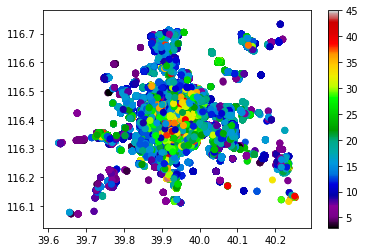

In [43]:
##series = df[[df['age']>=5  and df['age'] <= 45]]
df.insert(26, 'age1', value = df['age'])
df.drop(df.index[df['age1'] > 45], inplace = True)
colors = np.array(df['age1'])
plt.scatter(df['Lat'], df['Lng'], c = colors, cmap = 'nipy_spectral')
plt.colorbar()


### Plotting graph 'Lat' vs 'Lng' which depicts the price distribution

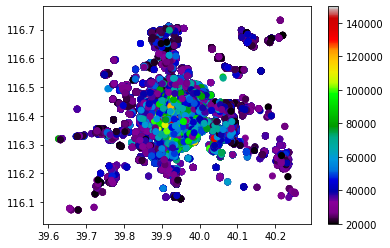

In [44]:
##series = df[[df['age']>=5  and df['age'] <= 45]]

colors = np.array(df['price'])
plt.scatter(df['Lat'], df['Lng'], c = colors, cmap = 'nipy_spectral')
plt.colorbar()



### Plotting the Boxplot which depicts the correlation between District and Price

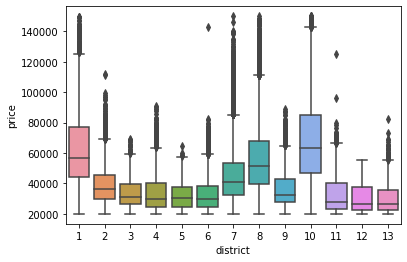

In [45]:
sb.boxplot(df['district'], df['price'])

### Plotting Boxplot which depicts the correlatoin between Building Type and Price

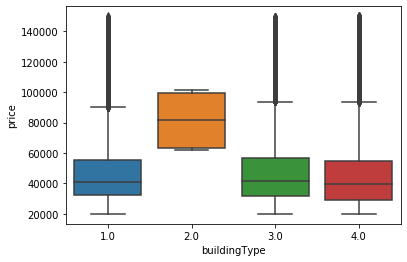

In [46]:
sb.boxplot(df['buildingType'], df['price'])

### Plotting Boxplot which depicts the correlation between Building Type and Area

(0, 160)

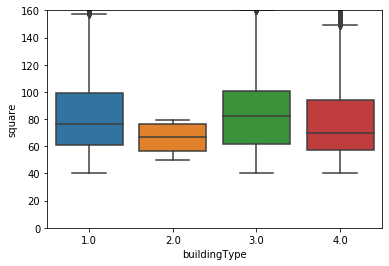

In [47]:
sb.boxplot(df['buildingType'], df['square'])
plt.ylim(0, 160)

### Dropping all the rows having NULL/NaN values

In [52]:
df.dropna(axis = 0, inplace = True)

### Converting dataframe column 'price' into array and assigning it to y

In [8]:
y = df.loc[:, 'price'].values

### Converting all the numerical attributes into arrays and assigning it to x

In [55]:
x = df.loc[:, ['followers', 'square', 'livingRoom', 'age',  'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'distance', 'buildingType', 'renovationCondition', 'buildingStructure', 'district', 'floorHeight', 'communityAverage']].values

### Performing OneHotEncoding to all categorical attributes

In [57]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [12])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [58]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [24])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [59]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [29])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [60]:

ct = ColumnTransformer([('encoder', OneHotEncoder(), [32])], remainder = 'passthrough')
x = ct.fit_transform(x)

In [61]:
x.shape

(33174, 61)

In [62]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [63]:
df = df.dropna(inplace = True)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [65]:
clf = RandomForestClassifier(max_depth = 6, n_estimators = 10)
clf.fit(x_train, y_train)
#y_predict = clf.predict(x_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
import gc

gc.collect()

4217

In [67]:
y_predict = clf.predict(x_test)

In [68]:
y_predict

array([ 50000,  50000, 115480, ...,  50000,  50000,  50000], dtype=int64)

In [69]:
y_test

array([45781, 63305, 66064, ..., 30744, 46552, 51876], dtype=int64)

In [70]:
mean_squared_log_error(y_test, y_predict)

0.18114596100069186

In [71]:
#XGB
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 200, min_child_weight = 2, subsample = 1, colsample_bytre = 0.8, reg_lambda = 0.45, reg_alpha = 0, gamma = 0.5)


In [72]:
xgb.fit(x_train, y_train)

[21:53:04] WARNING: ..\src\learner.cc:573: 
Parameters: { "colsample_bytre" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytre=0.8, colsample_bytree=1,
             gamma=0.5, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=0.45, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
yxgb_predict = xgb.predict(x_test)

In [74]:
yxgb_predict

array([44873.125, 86265.05 , 56786.2  , ..., 38175.76 , 47685.918,
       42037.   ], dtype=float32)

In [75]:
mean_squared_log_error(y_test, yxgb_predict)

0.05835385192822959

In [79]:
lgbm = LGBMRegressor(learning_rate = 0.15, n_estimators = 64, min_child_weight = 2, num_leaves = 36, colsample_bytree = 0.8, reg_lambda = 0.40)

In [80]:
lgbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=20, min_child_weight=2, min_split_gain=0.0,
              n_estimators=64, n_jobs=-1, num_leaves=36, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [81]:
ylgbm = lgbm.predict(x_test) 

In [82]:
ylgbm

array([43656.55229159, 70082.65291043, 60964.65056028, ...,
       38394.32276685, 46866.62998199, 41731.89640863])

In [83]:
mean_squared_log_error(y_test, ylgbm)

0.05893817678366487

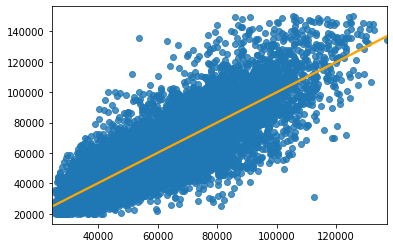

In [93]:
sb.regplot(ylgbm, y_test, line_kws = {"color" : "orange"})